<a href="https://colab.research.google.com/github/lordzwealth/ShopSmartInc-Project/blob/main/ShopSmartInc_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Overview

ShopSmart Inc. is an e-commerce platform that sells a variety of products online. The company aims to optimize its website and enhance customer satisfaction by understanding customer behavior and preferences. To achieve this goal, ShopSmart Inc. plans to analyze the data collected from its website to gain insights into customer interactions, purchasing patterns, and product preferences.

Project Objective: The objective of this project is to utilize data from ShopSmart Inc.'s website to understand customer behavior and preferences. By analyzing the data, the company aims to:

1.     Segment customers based on their preferences, geographic location, and purchasing behavior.
2.     Enhance website usability and user experience based on insights gained from customer interactions.
3.     Optimize product offerings and marketing strategies to improve customer satisfaction and retention.

- Data Sources:
The data for this project will be sourced from ShopSmart Inc.'s website and will include various attributes such as customer IDs, device IDs, transaction details, product information, and timestamps of customer interactions.



## Importing Libraries & Loadind Datasets

In [1]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Loading our Datasets
file1 = '/content/customers.csv'
file2 = '/content/events.csv'
file3 = '/content/orders.csv'
file4 = '/content/line_items.csv'
file5 = '/content/products.csv'

customers_df = pd.read_csv(file1)
events_df = pd.read_csv(file2)
orders_df = pd.read_csv(file3)
line_items_df = pd.read_csv(file4)
products_df = pd.read_csv(file5)

## Previewing our datasets

In [3]:
customers_df.head()

,customer_id,device_id,location,currency
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD
1,5cc88463-6a08-48b5-977c-9683a1c607b2,ba53d790-0cfc-4c00-9ab7-a6b104dceb65,United States of America,GBP
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN
3,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,Djibouti,NGN
4,873618f1-c201-4f8c-94bc-4cfc3d6d8cc8,1e939baf-c71d-444d-a832-d7dc3a6fcd0d,Guinea-Bissau,GBP


In [4]:
events_df.head()

,event_id,customer_id,event_data,event_timestamp
0,14753,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-21T12:47:11.012084"", ""e...",2024-03-21 12:47:11.012084
1,14754,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-27T11:35:50.208930"", ""e...",2024-03-27 11:35:50.208930
2,14755,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-30T04:03:10.392205"", ""e...",2024-03-30 04:03:10.392205
3,14756,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""item_id"": 12, ""quantity"": 5, ""timestamp"": ""2...",2024-03-30 04:03:10.394393
4,14757,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""item_id"": 11, ""quantity"": 1, ""timestamp"": ""2...",2024-03-30 04:03:10.394398


In [5]:
orders_df.head()

,order_id,customer_id,status,checked_out_at
0,5e57de16-d33c-4126-bf0b-da65449cc3d1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,cancelled,2024-03-30 04:12:10.394413
1,62a67177-1d7f-44fe-86f8-622686d68f69,5cc88463-6a08-48b5-977c-9683a1c607b2,cancelled,2024-03-30 04:15:10.403885
2,9e950ce3-2e12-479c-a051-493c1a497d49,cda7bec0-7cbf-4145-baf9-e049bab94504,success,2024-03-30 04:19:10.406794
3,cddddfea-27ef-437f-817d-8f849d604c3c,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,failed,2024-03-30 04:09:10.411149
4,170a66c8-6b39-468c-935c-445eb6be9fdf,873618f1-c201-4f8c-94bc-4cfc3d6d8cc8,cancelled,2024-03-30 04:09:10.412870


In [6]:
line_items_df.head()

,line_item_id,order_id,item_id,quantity
0,3201,9e950ce3-2e12-479c-a051-493c1a497d49,4,2
1,3202,9e950ce3-2e12-479c-a051-493c1a497d49,5,4
2,3203,9e950ce3-2e12-479c-a051-493c1a497d49,9,5
3,3204,9e950ce3-2e12-479c-a051-493c1a497d49,12,1
4,3205,9e950ce3-2e12-479c-a051-493c1a497d49,6,2


In [7]:
products_df.head(15)

,id,name,price
0,1,iPhone 13,1099.99
1,2,Samsung Galaxy S21,899.99
2,3,Sony PlayStation 5,499.99
3,4,Microsoft Xbox Series X,499.99
4,5,Nike Air Max 270,129.99
5,6,Adidas Ultraboost,180.00
6,7,Apple AirPods Pro,249.99
7,8,Sony WH-1000XM4 Headphones,349.99
8,9,Nintendo Switch,299.99
9,10,Dell XPS 13 Laptop,1299.99


## Merging Operations

- We have our various datasets, even though they are all inter-related, we need them all in one dataset to perform our analysis properly.
- We need to `merge` the datasets to acheive that.

In [8]:
# Merging our customers datafram with the events dataframe
merged_df = pd.merge(customers_df, events_df, on='customer_id')

In [9]:
merged_df.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14753,"{""timestamp"": ""2024-03-21T12:47:11.012084"", ""e...",2024-03-21 12:47:11.012084
1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14754,"{""timestamp"": ""2024-03-27T11:35:50.208930"", ""e...",2024-03-27 11:35:50.208930
2,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14755,"{""timestamp"": ""2024-03-30T04:03:10.392205"", ""e...",2024-03-30 04:03:10.392205
3,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14756,"{""item_id"": 12, ""quantity"": 5, ""timestamp"": ""2...",2024-03-30 04:03:10.394393
4,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14757,"{""item_id"": 11, ""quantity"": 1, ""timestamp"": ""2...",2024-03-30 04:03:10.394398


In [10]:
# Merging the resulting dataframe with the orders dataframe
merged_df2 = pd.merge(merged_df, orders_df, on='customer_id')

In [11]:
merged_df2.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14753,"{""timestamp"": ""2024-03-21T12:47:11.012084"", ""e...",2024-03-21 12:47:11.012084,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413
1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14754,"{""timestamp"": ""2024-03-27T11:35:50.208930"", ""e...",2024-03-27 11:35:50.208930,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413
2,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14755,"{""timestamp"": ""2024-03-30T04:03:10.392205"", ""e...",2024-03-30 04:03:10.392205,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413
3,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14756,"{""item_id"": 12, ""quantity"": 5, ""timestamp"": ""2...",2024-03-30 04:03:10.394393,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413
4,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14757,"{""item_id"": 11, ""quantity"": 1, ""timestamp"": ""2...",2024-03-30 04:03:10.394398,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413


In [12]:
# Merging the resulting dataframe with the line_items dataframe
merged_df3 = pd.merge(merged_df2, line_items_df, on='order_id')

In [13]:
merged_df3.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,line_item_id,item_id,quantity
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3202,5,4
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3203,9,5
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3204,12,1
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3205,6,2


In [14]:
# Merging the resulting dataframe with the orders dataframe
final_df = pd.merge(merged_df3, products_df, left_on='item_id', right_on='id', how='outer')

In [15]:
# dropping one of item_id or id after merging
final_df.drop(['id'], axis=1, inplace=True)

In [16]:
final_df.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,line_item_id,item_id,quantity,name,price
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",2024-03-27 07:14:33.987347,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14788,"{""timestamp"": ""2024-03-30T04:03:10.406559"", ""e...",2024-03-30 04:03:10.406559,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14789,"{""timestamp"": ""2024-03-30T04:03:10.406561"", ""e...",2024-03-30 04:03:10.406561,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14790,"{""item_id"": 4, ""quantity"": 2, ""timestamp"": ""20...",2024-03-30 04:03:10.406769,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99


In [17]:
# Printing the shape of our final dataset
print("Merged DataFrame Shape:", final_df.shape)
print("Number of Rows:", final_df.shape[0])
print("Number of Columns:", final_df.shape[1])

Merged DataFrame Shape: (578320, 15)
Number of Rows: 578320
Number of Columns: 15


In [18]:
# Check the data types of the dataframe
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578320 entries, 0 to 578319
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_id      578320 non-null  object 
 1   device_id        578320 non-null  object 
 2   location         578320 non-null  object 
 3   currency         578320 non-null  object 
 4   event_id         578320 non-null  int64  
 5   event_data       578320 non-null  object 
 6   event_timestamp  578320 non-null  object 
 7   order_id         578320 non-null  object 
 8   status           578320 non-null  object 
 9   checked_out_at   578320 non-null  object 
 10  line_item_id     578320 non-null  int64  
 11  item_id          578320 non-null  int64  
 12  quantity         578320 non-null  int64  
 13  name             578320 non-null  object 
 14  price            578320 non-null  float64
dtypes: float64(1), int64(4), object(10)
memory usage: 66.2+ MB


## Data Inspection - Duplicates, Missing Values et al

In [19]:
# Check for Duplicates
final_df.duplicated().sum()

0

In [20]:
# Check for missing values
final_df.isna().sum()

customer_id        0
device_id          0
location           0
currency           0
event_id           0
event_data         0
event_timestamp    0
order_id           0
status             0
checked_out_at     0
line_item_id       0
item_id            0
quantity           0
name               0
price              0
dtype: int64

- Extracting the last six characters of the `customer_id`, `device_id` and `order_id` to have a more cleaner and readable data

In [21]:
# Extracting the last six characters from the 'customer_id' column
final_df['customer_id'] = final_df['customer_id'].str[-6:]

# Extracting the last six characters from the 'device_id' column
final_df['device_id'] = final_df['device_id'].str[-6:]

# Extracting the last six characters from the 'order_id' column
final_df['order_id'] = final_df['order_id'].str[-6:]

## Feature Engineering

We've established that we have a clean data, let's do some feature engineering, by generating new columns from our default columns to give us more information regarding our analysis.

In [22]:
final_df.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,line_item_id,item_id,quantity,name,price
0,b94504,17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
1,b94504,17b245,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",2024-03-27 07:14:33.987347,497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
2,b94504,17b245,Saint Helena,NGN,14788,"{""timestamp"": ""2024-03-30T04:03:10.406559"", ""e...",2024-03-30 04:03:10.406559,497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
3,b94504,17b245,Saint Helena,NGN,14789,"{""timestamp"": ""2024-03-30T04:03:10.406561"", ""e...",2024-03-30 04:03:10.406561,497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
4,b94504,17b245,Saint Helena,NGN,14790,"{""item_id"": 4, ""quantity"": 2, ""timestamp"": ""20...",2024-03-30 04:03:10.406769,497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99


- Looking at our `'event_timestamp'` and `'checked_out_at'` columns, We have both the date and time in the same column.
- Let's create new columns to seperate our date and time from the columns.
- Also, we're going to create a new column for the `'day_of_week'`.

In [23]:
# Convert 'event_timestamp' to datetime
final_df['event_timestamp'] = pd.to_datetime(final_df['event_timestamp'])

# Extract date, time, and day of the week into separate columns
final_df['event_day_of_week'] = final_df['event_timestamp'].dt.day_name()
final_df['event_date'] = final_df['event_timestamp'].dt.date
final_df['event_time'] = final_df['event_timestamp'].dt.time

In [24]:
final_df['event_time'] = final_df['event_time'].astype(str)

In [25]:
final_df['event_time'] = pd.to_datetime(final_df['event_time'])

<ipython-input-25-df812a9fb181>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_df['event_time'] = pd.to_datetime(final_df['event_time'])


In [26]:
# Extract time into a more readable format
final_df['event_time'] = final_df['event_time'].dt.strftime('%I:%M%p')

In [27]:
final_df.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,line_item_id,item_id,quantity,name,price,event_day_of_week,event_date,event_time
0,b94504,17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99,Tuesday,2024-03-26,10:05PM
1,b94504,17b245,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",2024-03-27 07:14:33.987347,497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99,Wednesday,2024-03-27,07:14AM
2,b94504,17b245,Saint Helena,NGN,14788,"{""timestamp"": ""2024-03-30T04:03:10.406559"", ""e...",2024-03-30 04:03:10.406559,497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99,Saturday,2024-03-30,04:03AM
3,b94504,17b245,Saint Helena,NGN,14789,"{""timestamp"": ""2024-03-30T04:03:10.406561"", ""e...",2024-03-30 04:03:10.406561,497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99,Saturday,2024-03-30,04:03AM
4,b94504,17b245,Saint Helena,NGN,14790,"{""item_id"": 4, ""quantity"": 2, ""timestamp"": ""20...",2024-03-30 04:03:10.406769,497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99,Saturday,2024-03-30,04:03AM


- We've been able to create new columns from our `'event_timestamp'`column to get a more clearer picture, now let's do the same for the `'checked_out_at'` column.

In [28]:
# Convert 'event_timestamp' to datetime
final_df['checked_out_at'] = pd.to_datetime(final_df['checked_out_at'])

# Extract date, time, and day of the week into separate columns
final_df['checkOut_day_of_week'] = final_df['checked_out_at'].dt.day_name()
final_df['checkOut_date'] = final_df['checked_out_at'].dt.date
final_df['checkOut_time'] = final_df['checked_out_at'].dt.time

In [29]:
final_df['checkOut_time'] = final_df['checkOut_time'].astype(str)
final_df['checkOut_time'] = pd.to_datetime(final_df['checkOut_time'])

<ipython-input-29-1fda385b2d93>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_df['checkOut_time'] = pd.to_datetime(final_df['checkOut_time'])


In [30]:
# Extract checkOut_time into a more readable format
final_df['checkOut_time'] = final_df['checkOut_time'].dt.strftime('%I:%M%p')

In [31]:
final_df.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,...,item_id,quantity,name,price,event_day_of_week,event_date,event_time,checkOut_day_of_week,checkOut_date,checkOut_time
0,b94504,17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,497d49,success,2024-03-30 04:19:10.406794,...,4,2,Microsoft Xbox Series X,499.99,Tuesday,2024-03-26,10:05PM,Saturday,2024-03-30,04:19AM
1,b94504,17b245,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",2024-03-27 07:14:33.987347,497d49,success,2024-03-30 04:19:10.406794,...,4,2,Microsoft Xbox Series X,499.99,Wednesday,2024-03-27,07:14AM,Saturday,2024-03-30,04:19AM
2,b94504,17b245,Saint Helena,NGN,14788,"{""timestamp"": ""2024-03-30T04:03:10.406559"", ""e...",2024-03-30 04:03:10.406559,497d49,success,2024-03-30 04:19:10.406794,...,4,2,Microsoft Xbox Series X,499.99,Saturday,2024-03-30,04:03AM,Saturday,2024-03-30,04:19AM
3,b94504,17b245,Saint Helena,NGN,14789,"{""timestamp"": ""2024-03-30T04:03:10.406561"", ""e...",2024-03-30 04:03:10.406561,497d49,success,2024-03-30 04:19:10.406794,...,4,2,Microsoft Xbox Series X,499.99,Saturday,2024-03-30,04:03AM,Saturday,2024-03-30,04:19AM
4,b94504,17b245,Saint Helena,NGN,14790,"{""item_id"": 4, ""quantity"": 2, ""timestamp"": ""20...",2024-03-30 04:03:10.406769,497d49,success,2024-03-30 04:19:10.406794,...,4,2,Microsoft Xbox Series X,499.99,Saturday,2024-03-30,04:03AM,Saturday,2024-03-30,04:19AM


- We've successfully created new columns from our `'event_timestamp'` and `'checked_out_at'` columns, thereby making them redundant.
- Let's proceed to drop the two columns.

In [32]:
# dropping of event_timestamp and 'checked_out_at' column
final_df.drop(['event_timestamp'], axis=1, inplace=True)
final_df.drop(['checked_out_at'], axis=1, inplace=True)

In [33]:
final_df.head()

,customer_id,device_id,location,currency,event_id,event_data,order_id,status,line_item_id,item_id,quantity,name,price,event_day_of_week,event_date,event_time,checkOut_day_of_week,checkOut_date,checkOut_time
0,b94504,17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Tuesday,2024-03-26,10:05PM,Saturday,2024-03-30,04:19AM
1,b94504,17b245,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Wednesday,2024-03-27,07:14AM,Saturday,2024-03-30,04:19AM
2,b94504,17b245,Saint Helena,NGN,14788,"{""timestamp"": ""2024-03-30T04:03:10.406559"", ""e...",497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Saturday,2024-03-30,04:03AM,Saturday,2024-03-30,04:19AM
3,b94504,17b245,Saint Helena,NGN,14789,"{""timestamp"": ""2024-03-30T04:03:10.406561"", ""e...",497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Saturday,2024-03-30,04:03AM,Saturday,2024-03-30,04:19AM
4,b94504,17b245,Saint Helena,NGN,14790,"{""item_id"": 4, ""quantity"": 2, ""timestamp"": ""20...",497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Saturday,2024-03-30,04:03AM,Saturday,2024-03-30,04:19AM


In [34]:
# Rename some column names
final_df.rename(columns={'event_day_of_week': 'event_day'}, inplace=True)
final_df.rename(columns={'checkOut_day_of_week': 'checkOut_day'}, inplace=True)

In [35]:
final_df.head()

,customer_id,device_id,location,currency,event_id,event_data,order_id,status,line_item_id,item_id,quantity,name,price,event_day,event_date,event_time,checkOut_day,checkOut_date,checkOut_time
0,b94504,17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Tuesday,2024-03-26,10:05PM,Saturday,2024-03-30,04:19AM
1,b94504,17b245,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Wednesday,2024-03-27,07:14AM,Saturday,2024-03-30,04:19AM
2,b94504,17b245,Saint Helena,NGN,14788,"{""timestamp"": ""2024-03-30T04:03:10.406559"", ""e...",497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Saturday,2024-03-30,04:03AM,Saturday,2024-03-30,04:19AM
3,b94504,17b245,Saint Helena,NGN,14789,"{""timestamp"": ""2024-03-30T04:03:10.406561"", ""e...",497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Saturday,2024-03-30,04:03AM,Saturday,2024-03-30,04:19AM
4,b94504,17b245,Saint Helena,NGN,14790,"{""item_id"": 4, ""quantity"": 2, ""timestamp"": ""20...",497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Saturday,2024-03-30,04:03AM,Saturday,2024-03-30,04:19AM


In [36]:
final_df.columns

Index(['customer_id', 'device_id', 'location', 'currency', 'event_id',
       'event_data', 'order_id', 'status', 'line_item_id', 'item_id',
       'quantity', 'name', 'price', 'event_day', 'event_date', 'event_time',
       'checkOut_day', 'checkOut_date', 'checkOut_time'],
      dtype='object')

In [37]:
final_df = final_df[['customer_id', 'device_id', 'location', 'currency', 'event_id',
                     'event_data','event_day', 'event_date','event_time', 'order_id',
                     'status', 'checkOut_day', 'checkOut_date', 'checkOut_time',
                     'line_item_id', 'item_id', 'quantity', 'name', 'price',]]

In [38]:
final_df.head()

,customer_id,device_id,location,currency,event_id,event_data,event_day,event_date,event_time,order_id,status,checkOut_day,checkOut_date,checkOut_time,line_item_id,item_id,quantity,name,price
0,b94504,17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",Tuesday,2024-03-26,10:05PM,497d49,success,Saturday,2024-03-30,04:19AM,3201,4,2,Microsoft Xbox Series X,499.99
1,b94504,17b245,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",Wednesday,2024-03-27,07:14AM,497d49,success,Saturday,2024-03-30,04:19AM,3201,4,2,Microsoft Xbox Series X,499.99
2,b94504,17b245,Saint Helena,NGN,14788,"{""timestamp"": ""2024-03-30T04:03:10.406559"", ""e...",Saturday,2024-03-30,04:03AM,497d49,success,Saturday,2024-03-30,04:19AM,3201,4,2,Microsoft Xbox Series X,499.99
3,b94504,17b245,Saint Helena,NGN,14789,"{""timestamp"": ""2024-03-30T04:03:10.406561"", ""e...",Saturday,2024-03-30,04:03AM,497d49,success,Saturday,2024-03-30,04:19AM,3201,4,2,Microsoft Xbox Series X,499.99
4,b94504,17b245,Saint Helena,NGN,14790,"{""item_id"": 4, ""quantity"": 2, ""timestamp"": ""20...",Saturday,2024-03-30,04:03AM,497d49,success,Saturday,2024-03-30,04:19AM,3201,4,2,Microsoft Xbox Series X,499.99


- Our dataframe looks cleaner now and more readable, but our `'event_data'` still looks packed
- Let's check for unique keys inside the `'event_data'` column

In [39]:
import json

In [40]:
# checking all unique keys inside the 'event_data' column
unique_keys = set()

for json_str in final_df['event_data']:
    data = json.loads(json_str)
    unique_keys.update(data.keys())

print("Unique keys in 'event_data' column:", unique_keys)

Unique keys in 'event_data' column: {'order_id', 'item_id', 'status', 'timestamp', 'quantity', 'event_type'}


- After inspecting the 'event_data' column, we discovered that most of the keys are already represented in other columns in our dataframe, thereby giving us repititive data
- Let's remove the other keys that are already represented in other columns

In [41]:
# Define a function to remove keys from dictionaries
def remove_keys(json_str, keys_to_remove):
    data = json.loads(json_str)
    for key in keys_to_remove:
        data.pop(key, None)
    return json.dumps(data)

In [42]:
# Specify keys to remove
keys_to_remove = ['item_id', 'order_id', 'timestamp', 'quantity', 'status']

# Apply the function to remove keys from the 'event_data' column
final_df['event_data'] = final_df['event_data'].apply(lambda x: remove_keys(x, keys_to_remove))

In [43]:
final_df.head()

,customer_id,device_id,location,currency,event_id,event_data,event_day,event_date,event_time,order_id,status,checkOut_day,checkOut_date,checkOut_time,line_item_id,item_id,quantity,name,price
0,b94504,17b245,Saint Helena,NGN,14786,"{""event_type"": ""visit""}",Tuesday,2024-03-26,10:05PM,497d49,success,Saturday,2024-03-30,04:19AM,3201,4,2,Microsoft Xbox Series X,499.99
1,b94504,17b245,Saint Helena,NGN,14787,"{""event_type"": ""visit""}",Wednesday,2024-03-27,07:14AM,497d49,success,Saturday,2024-03-30,04:19AM,3201,4,2,Microsoft Xbox Series X,499.99
2,b94504,17b245,Saint Helena,NGN,14788,"{""event_type"": ""visit""}",Saturday,2024-03-30,04:03AM,497d49,success,Saturday,2024-03-30,04:19AM,3201,4,2,Microsoft Xbox Series X,499.99
3,b94504,17b245,Saint Helena,NGN,14789,"{""event_type"": ""visit""}",Saturday,2024-03-30,04:03AM,497d49,success,Saturday,2024-03-30,04:19AM,3201,4,2,Microsoft Xbox Series X,499.99
4,b94504,17b245,Saint Helena,NGN,14790,"{""event_type"": ""add_to_cart""}",Saturday,2024-03-30,04:03AM,497d49,success,Saturday,2024-03-30,04:19AM,3201,4,2,Microsoft Xbox Series X,499.99


- Let's now create a new column from the `'event_data'` that holds our `'event_type'` values only.

In [44]:
# Define a function to extract values as a string and remove "event_type" keys
def clean_event_data(json_str):
    data = json.loads(json_str)
    event_data_values = ', '.join(str(value) for value in data.values() if value != '')
    return event_data_values

In [45]:
# Apply the function to "event_data" column
final_df['event_data'] = final_df['event_data'].apply(clean_event_data)

In [46]:
final_df['event_data'].unique()

array(['visit', 'add_to_cart', 'remove_from_cart', 'checkout'],
      dtype=object)

In [47]:
# Rename the 'event_data' column to 'event_type'
final_df.rename(columns={'event_data': 'event_type'}, inplace=True)

In [48]:
# Create a new column 'total_price' by multiplying 'quantity' and 'price'
final_df['total_price'] = final_df['quantity'] * final_df['price']

In [49]:
# Replace 'NGN' with 'EUR' in the 'currency' column
final_df['currency'] = final_df['currency'].replace('NGN', 'EUR')

In [50]:
final_df.head()

,customer_id,device_id,location,currency,event_id,event_type,event_day,event_date,event_time,order_id,status,checkOut_day,checkOut_date,checkOut_time,line_item_id,item_id,quantity,name,price,total_price
0,b94504,17b245,Saint Helena,EUR,14786,visit,Tuesday,2024-03-26,10:05PM,497d49,success,Saturday,2024-03-30,04:19AM,3201,4,2,Microsoft Xbox Series X,499.99,999.98
1,b94504,17b245,Saint Helena,EUR,14787,visit,Wednesday,2024-03-27,07:14AM,497d49,success,Saturday,2024-03-30,04:19AM,3201,4,2,Microsoft Xbox Series X,499.99,999.98
2,b94504,17b245,Saint Helena,EUR,14788,visit,Saturday,2024-03-30,04:03AM,497d49,success,Saturday,2024-03-30,04:19AM,3201,4,2,Microsoft Xbox Series X,499.99,999.98
3,b94504,17b245,Saint Helena,EUR,14789,visit,Saturday,2024-03-30,04:03AM,497d49,success,Saturday,2024-03-30,04:19AM,3201,4,2,Microsoft Xbox Series X,499.99,999.98
4,b94504,17b245,Saint Helena,EUR,14790,add_to_cart,Saturday,2024-03-30,04:03AM,497d49,success,Saturday,2024-03-30,04:19AM,3201,4,2,Microsoft Xbox Series X,499.99,999.98


## Data Wrangling
- Now that we have cleaned our data, Added new columns, Let's proceed to do some wrangling on our Data

In [51]:
#check for the difference in dates
date_difference = final_df['event_date'].max() - final_df['event_date'].min()
print("Difference between max and min event dates:", date_difference)

Difference between max and min event dates: 11 days, 0:00:00


In [52]:
# date with the highest volume of activity
high_volume_date = final_df['event_date'].value_counts()
print("Date with the highest volume of activity:", high_volume_date.index[0])
print("Date with the lowest volume of activity:", high_volume_date.index[-1])

Date with the highest volume of activity: 2024-03-30
Date with the lowest volume of activity: 2024-03-29


In [53]:
#Top 5 users with the highest number of activity on the website
top5_customers = final_df['customer_id'].value_counts().head()
print(top5_customers)

customer_id
fe2338    372
0130cb    360
34f5c8    360
c6b31c    360
dc57a6    360
Name: count, dtype: int64


In [54]:
# Calculate value counts
event_type_counts = final_df['event_type'].value_counts()
print(event_type_counts)

event_type
add_to_cart         269335
visit               143154
remove_from_cart    134090
checkout             31741
Name: count, dtype: int64


## Visit Frequency:
- How often does this customer visit the website, based on the provided data?


In [55]:
# Calculate percentages
event_type_perc = event_type_counts / len(final_df) * 100
print(event_type_perc)

event_type
add_to_cart         46.571967
visit               24.753424
remove_from_cart    23.186125
checkout             5.488484
Name: count, dtype: float64


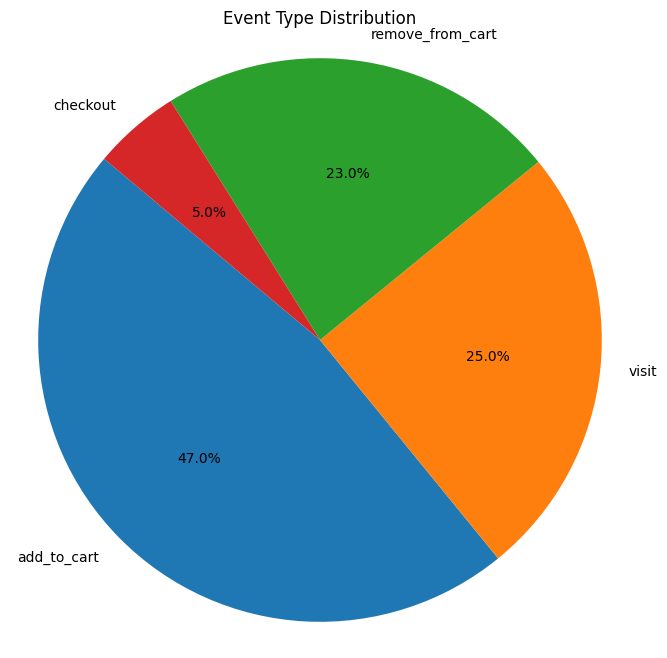

In [56]:
# Event types and their corresponding percentages
event_types = ['add_to_cart', 'visit', 'remove_from_cart', 'checkout']
percentages = [47, 25, 23, 5]  # Replace with your actual percentages

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=event_types, autopct='%1.1f%%', startangle=140)
plt.title('Event Type Distribution')
plt.axis('equal')
plt.show()

- We can see the users activity percentage on the webiste,
- 45.5% of users added at least an item to the cart
- 24.7% of users are just visitors
- 23% of website users remove at least an item from cart
- 5% of website users checkout at least an item


In [57]:
# Checking for customers with the most frequent visit to the website
visit_counts = final_df[final_df['event_type'] == 'visit']['customer_id'].value_counts().head(10)
print(visit_counts)

customer_id
21d999    120
681a02    120
81a758    120
34f5c8    120
c388e6    110
a57fb6    110
5cae33    110
eac7aa    110
4f16f5    110
929b56    110
Name: count, dtype: int64


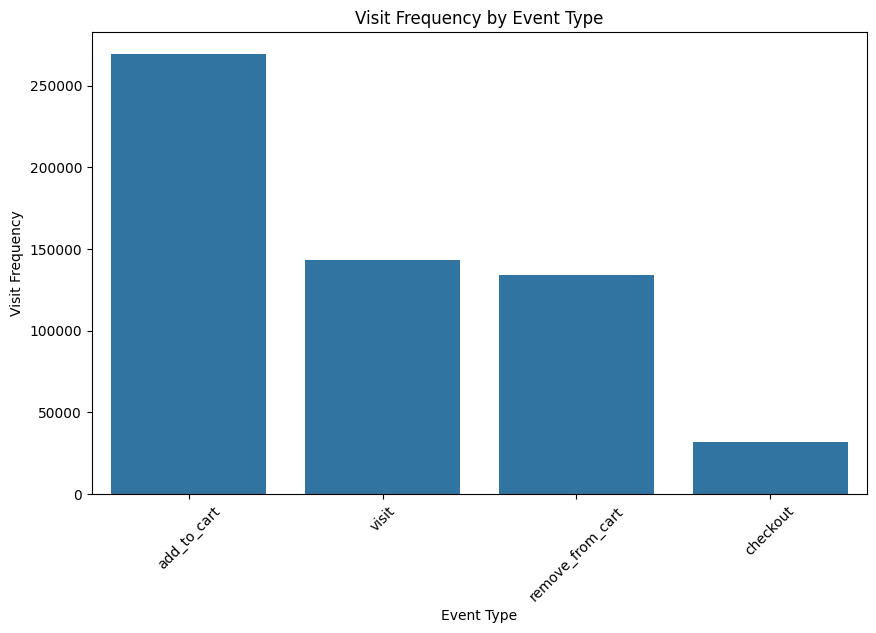

In [58]:
# Calculate visit frequency for each event type
event_type_counts = final_df['event_type'].value_counts()

# Plot bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=event_type_counts.index, y=event_type_counts.values)
plt.title('Visit Frequency by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Visit Frequency')
plt.xticks(rotation=45)
plt.show()

- From the plot above, we can conclude that most visit on the website results in customers adding at least an `item to Cart`, but only few of them end up purchasing(`checkout`).
- The company may try and look at their conversion rate, converting the customers that added item to the cart to proceed to `checkout`.
- Advertisement and better User Experience may help regarding this.

## Location Analysis:
- What are the customer's location based on the provided data?


In [59]:
# Checking for customers with the most frequent activities to the website
top10_loca_visit = final_df.groupby(['location'])['event_type'].count().sort_values(ascending=False).head(10)
top10_loca_visit

location
Korea            6997
Argentina        4507
Mauritius        4414
Jersey           4130
Panama           3936
French Guiana    3851
Guernsey         3804
Guatemala        3731
Albania          3721
Philippines      3675
Name: event_type, dtype: int64

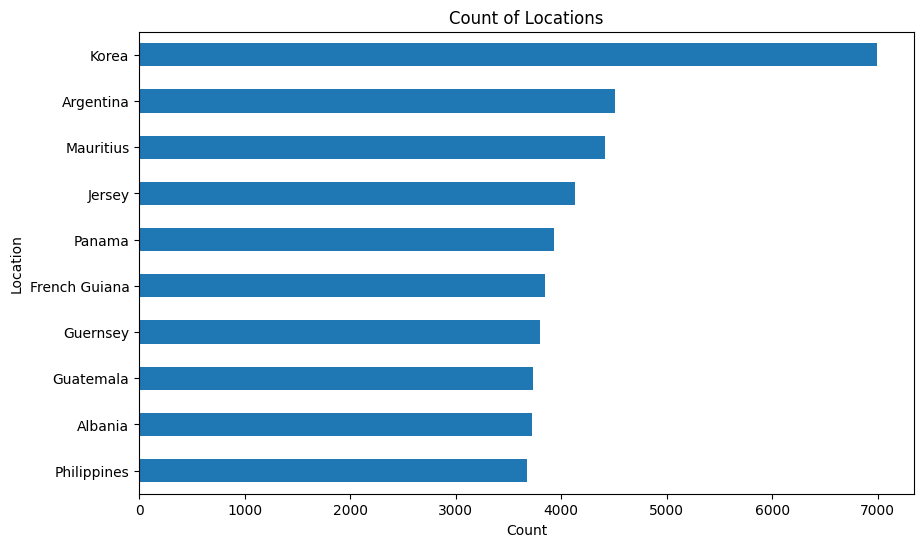

In [60]:
# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
top10_loca_visit.plot(kind='barh')
plt.title('Count of Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

In [61]:
# Top 10 locations with the highest purchase history
top10_locations = final_df[final_df.event_type == 'checkout']['location'].value_counts().head(10)

In [62]:
top10_locations

location
Korea            347
Mauritius        236
Argentina        236
Jersey           223
Albania          215
Panama           213
French Guiana    212
Guernsey         204
Congo            203
Guatemala        202
Name: count, dtype: int64

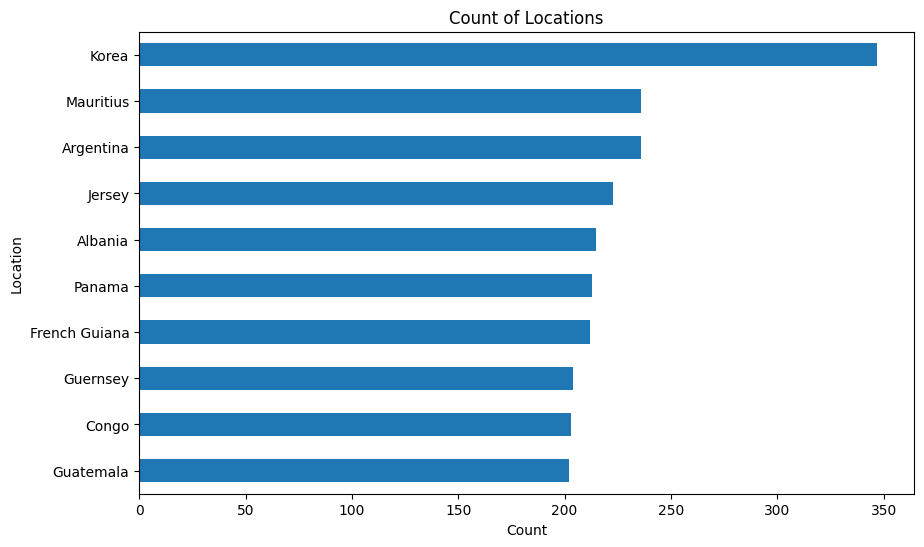

In [63]:
# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
top10_locations.plot(kind='barh')
plt.title('Count of Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

In [64]:
# checking for locations with the highest visit frequency
final_df[final_df.event_type == 'visit']['location'].value_counts()

location
Korea              1826
Mauritius          1126
Congo              1106
Jersey             1084
Argentina          1081
                   ... 
Kyrgyz Republic     253
Italy               248
Honduras            245
Uruguay             232
Chad                218
Name: count, Length: 243, dtype: int64

In [65]:
# checking for locations with the highest add_to_cart frequency
final_df[final_df.event_type == 'add_to_cart']['location'].value_counts()

location
Korea        3179
Argentina    2096
Mauritius    2086
Jersey       2019
Albania      1929
             ... 
Taiwan        520
Malaysia      431
Austria       359
Italy         336
Uruguay       324
Name: count, Length: 243, dtype: int64

In [66]:
# checking for locations with the highest remove_from_cart frequency
final_df[final_df.event_type == 'remove_from_cart']['location'].value_counts()

location
Korea         1645
Argentina     1094
Guatemala      993
Mauritius      966
Guernsey       936
              ... 
Azerbaijan     242
Taiwan         208
Austria        167
Italy          137
Uruguay        130
Name: count, Length: 243, dtype: int64

In [67]:
# Group data by location and count visits
location_counts = final_df.groupby('location').size().sort_values(ascending=False)
location_counts

location
Korea        6997
Argentina    4507
Mauritius    4414
Jersey       4130
Panama       3936
             ... 
Chad         1082
Malaysia     1037
Austria       921
Italy         783
Uruguay       734
Length: 243, dtype: int64

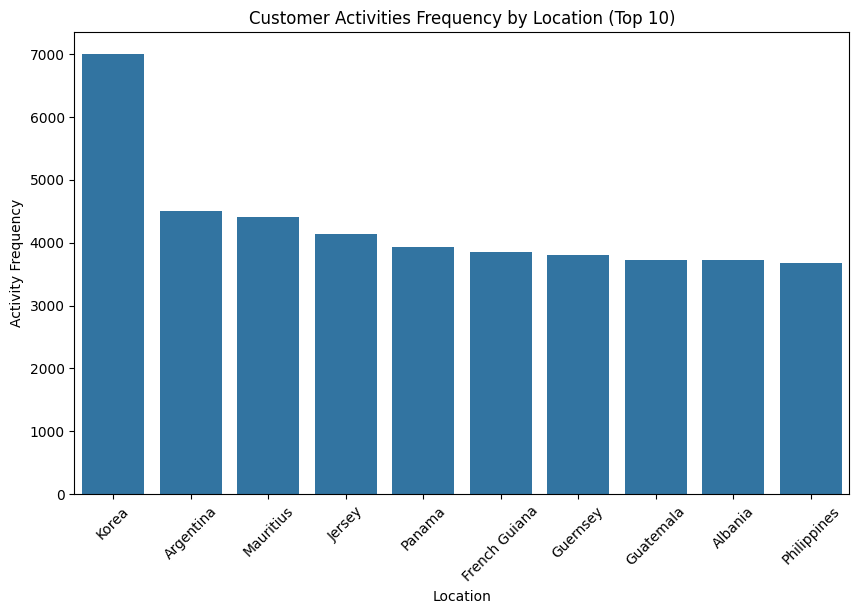

In [68]:
# Group data by location and activities count
location_counts = final_df.groupby('location').size().sort_values(ascending=False)

# Select the top 10 locations with the highest visit frequencies
top_10_locations = location_counts.head(10)

# Plot bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values)
plt.title('Customer Activities Frequency by Location (Top 10)')
plt.xlabel('Location')
plt.ylabel('Activity Frequency')
plt.xticks(rotation=45)
plt.show()

In [69]:
# Filter the DataFrame by customers that checkout
checkout_cust = final_df[final_df['event_type'] == 'checkout']

In [70]:
checkout_cust['location'].value_counts().head(10)

location
Korea            347
Mauritius        236
Argentina        236
Jersey           223
Albania          215
Panama           213
French Guiana    212
Guernsey         204
Congo            203
Guatemala        202
Name: count, dtype: int64

In [71]:
# customers with the highest purchase occurence
top_checkout_cust =  final_df[final_df['event_type'] == 'checkout']
top_checkout_cust

,customer_id,device_id,location,currency,event_id,event_type,event_day,event_date,event_time,order_id,status,checkOut_day,checkOut_date,checkOut_time,line_item_id,item_id,quantity,name,price,total_price
13,b94504,17b245,Saint Helena,EUR,14799,checkout,Saturday,2024-03-30,04:19AM,497d49,success,Saturday,2024-03-30,04:19AM,3201,4,2,Microsoft Xbox Series X,499.99,999.98
17,eb832b,991349,Mali,EUR,14889,checkout,Saturday,2024-03-30,04:06AM,6b4273,failed,Saturday,2024-03-30,04:06AM,3215,4,3,Microsoft Xbox Series X,499.99,1499.97
35,593623,aafd9d,Grenada,GBP,14935,checkout,Saturday,2024-03-30,04:13AM,aa9669,success,Saturday,2024-03-30,04:13AM,3224,4,2,Microsoft Xbox Series X,499.99,999.98
42,7a1710,e4260f,United States Minor Outlying Islands,EUR,14942,checkout,Saturday,2024-03-30,04:13AM,9ec822,failed,Saturday,2024-03-30,04:13AM,3227,4,3,Microsoft Xbox Series X,499.99,1499.97
65,cad1ab,0bf3e3,Saint Pierre and Miquelon,USD,14991,checkout,Saturday,2024-03-30,04:20AM,4b66f0,cancelled,Saturday,2024-03-30,04:20AM,3250,4,5,Microsoft Xbox Series X,499.99,2499.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578242,ece3ee,3ab2f3,Antigua and Barbuda,USD,161730,checkout,Saturday,2024-03-30,04:17AM,e4ff6b,failed,Saturday,2024-03-30,04:17AM,34897,3,3,Sony PlayStation 5,499.99,1499.97
578257,92fb0d,07a59b,Martinique,USD,161745,checkout,Saturday,2024-03-30,04:18AM,0181ff,success,Saturday,2024-03-30,04:18AM,34902,3,5,Sony PlayStation 5,499.99,2499.95
578279,a1691b,bdde5b,Mexico,EUR,161804,checkout,Saturday,2024-03-30,04:14AM,bbd82a,failed,Saturday,2024-03-30,04:14AM,34914,3,2,Sony PlayStation 5,499.99,999.98
578304,be130f,db4354,Angola,GBP,161905,checkout,Saturday,2024-03-30,04:18AM,b59a24,cancelled,Saturday,2024-03-30,04:18AM,34934,3,2,Sony PlayStation 5,499.99,999.98


In [72]:
# Top 10 locations with the highest checkout
top10_checkout_location = top_checkout_cust.groupby('location')['total_price'].sum().sort_values(ascending=False).head(10)
top10_checkout_location

location
Korea               700726.73
Argentina           508118.72
Singapore           505450.39
Congo               503323.09
Mauritius           486515.16
Rwanda              449891.28
North Macedonia     449672.95
Guernsey            449612.44
Cape Verde          436479.32
Christmas Island    436451.91
Name: total_price, dtype: float64

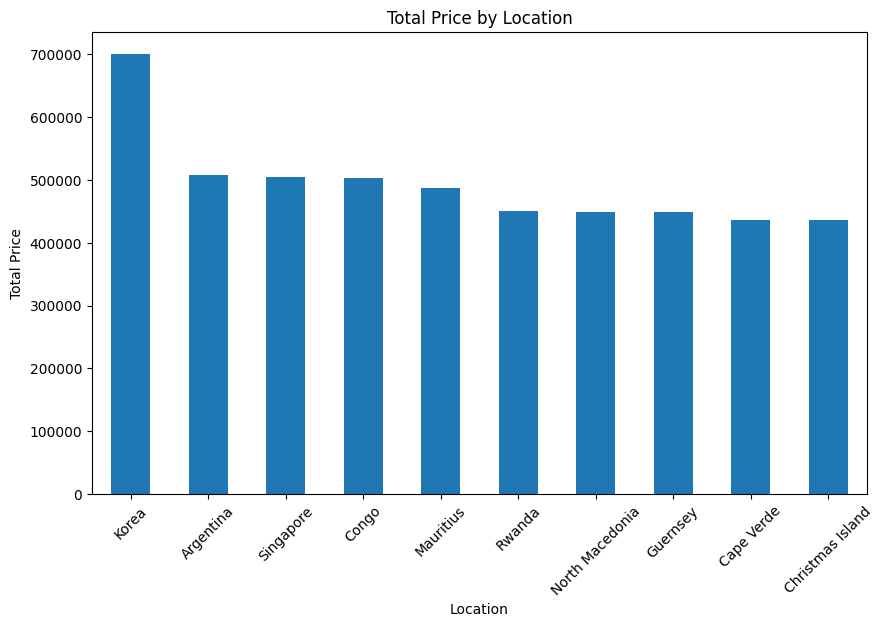

In [73]:
# Plotting the bar plot for the Top Locations with high purchases
plt.figure(figsize=(10, 6))
top10_checkout_location.plot(kind='bar')
plt.title('Total Price by Location')
plt.xlabel('Location')
plt.ylabel('Total Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [74]:
# Count the frequency of purchases for each product
products_puchased = top_checkout_cust['name'].value_counts()
products_puchased

name
Canon EOS R5 Camera            2174
Fitbit Charge 4                2172
Sony WH-1000XM4 Headphones     2150
iPhone 13                      2142
Adidas Ultraboost              2138
Microsoft Xbox Series X        2134
Dell XPS 13 Laptop             2134
Nike Air Max 270               2126
Samsung Galaxy S21             2123
Apple AirPods Pro              2116
Coca-Cola 12-Pack              2113
Samsung 55-Inch 4K Smart TV    2081
Sony PlayStation 5             2064
Starbucks Coffee Beans         2053
Nintendo Switch                2021
Name: count, dtype: int64

- This is an insight showing the how often these products are purchased

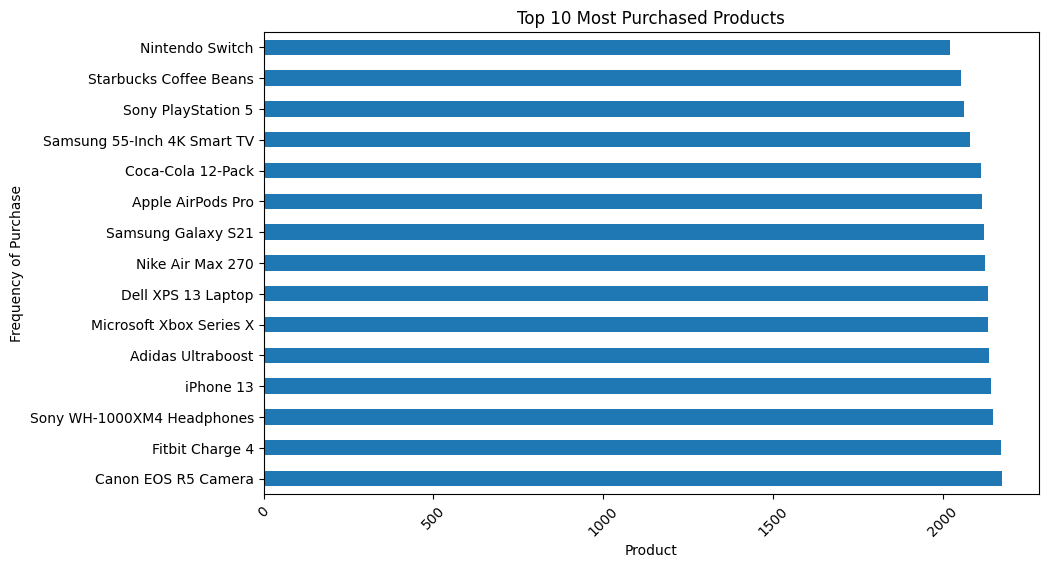

In [75]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))

# show the Top 10 products
products_puchased.plot(kind='barh')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Product')
plt.ylabel('Frequency of Purchase')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Overall Purchase Behavior:
 - Based on the data provided, what insights can you draw about this customer's overall behavior on the website?


In [76]:
# Group data by 'customer_id' and calculate total purchase amount for each customer
customer_purchase_total = checkout_cust.groupby('customer_id')['total_price'].sum()

# Sort customers by total purchase amount in descending order
customer_purchase_total_sorted = customer_purchase_total.sort_values(ascending=False)

# Select customers with the highest purchases
top_customers = customer_purchase_total_sorted.head(10)

print("Top 10 Customers with Highest Purchases:")
print(top_customers)

Top 10 Customers with Highest Purchases:
customer_id
20743f    41671.35
08857e    41617.65
185eb3    41555.61
ed4937    41551.58
340cf3    41507.53
25df41    41417.41
ad48e6    41129.38
ddf518    41129.37
fb986d    41120.35
6332d6    40724.54
Name: total_price, dtype: float64


In [77]:
# Retrieve the locations of those customer(s)
locations_of_highest_customers = checkout_cust[checkout_cust['customer_id'].isin(top_customers.index)]['location'].unique()
print("Locations of customers with the highest purchase:")
print(locations_of_highest_customers)

Locations of customers with the highest purchase:
['Comoros' 'Rwanda' 'Taiwan' 'Netherlands Antilles'
 'Bouvet Island (Bouvetoya)' 'Kazakhstan' 'Cameroon' 'Bahamas' 'Chile'
 'Switzerland']


In [78]:
# Count the occurrences of each item
item_counts = checkout_cust['name'].value_counts().head()

# Get the item with the highest count
mostly_ordered_item = item_counts.idxmax()

print("Mostly Ordered Item:", mostly_ordered_item)

Mostly Ordered Item: Canon EOS R5 Camera


In [79]:
item_counts

name
Canon EOS R5 Camera           2174
Fitbit Charge 4               2172
Sony WH-1000XM4 Headphones    2150
iPhone 13                     2142
Adidas Ultraboost             2138
Name: count, dtype: int64

## How might these insights inform marketing strategies or personalized recommendations for this customer?

- Based on the customer's purchase frequency and preferences for specific product categories, the businesses can tailor promotional offers and discounts to encourage repeat purchases and drive sales.
- Product Recommendations: Leveraging insights about the customer's most frequently ordered items, businesses can provide personalized product recommendations that align with the customer's interests and preferences. This can enhance the overall sales of the company.
- Company can also do location-based adverts to further drive up sales in those locations with high purchase rate.